In [203]:
#!pip install tensorflow
#!pip install keras

In [204]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM ,Dense ,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [205]:
%matplotlib inline

In [206]:
df = pd.read_csv('Chad.csv')

In [207]:
df.sort_index(axis=0,inplace=True,ascending=False)

In [208]:
df,df.shape

(          Date   Open   High    low  Close   Volume
 3913  20031019   2991   2991   2900   2916  2000000
 3912  20031020   3061   3061   3061   3061  7500000
 3911  20031021   3214   3214   3214   3214  6000000
 3910  20031022   3374   3374   3374   3374  3000000
 3909  20031025   3542   3542   3542   3542  9327800
 ...        ...    ...    ...    ...    ...      ...
 4     20220205  30000  30240  29560  29610  5515311
 3     20220206  29950  29950  28210  29160  4915291
 2     20220207  29150  29870  29010  29200  1705522
 1     20220208  29690  29890  29030  29580  3800062
 0     20220209  30000  30000  29410  29620  1754238
 
 [3914 rows x 6 columns],
 (3914, 6))

In [209]:
data=df.iloc[:,1:2].values

In [210]:
X=[]
y=[]
for i in range(60,data.shape[0]):
    X.append(data[i-60:i,0])
    y.append(data[i,0])
X = np.array(X)
y = np.array(y).reshape(-1,1)

In [211]:
X.shape,y.shape

((3854, 60), (3854, 1))

In [212]:
n=int(X.shape[0]*0.9)
X_train_ex,X_test_ex,y_train_ex,y_test_ex=X[:n,:],X[n:,:],y[:n],y[n:]

In [213]:
X_train_ex.shape,y_train_ex.shape,X_test_ex.shape,y_test_ex.shape

((3468, 60), (3468, 1), (386, 60), (386, 1))

In [214]:
Xscaler=MinMaxScaler(feature_range=(0,1), clip=True)
yscaler=MinMaxScaler(feature_range=(0,1), clip=True)

In [215]:
X_train = Xscaler.fit_transform(X_train_ex)
y_train = yscaler.fit_transform(y_train_ex)

In [216]:
reg = Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

In [217]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
109/109 [==============================] - 14s 77ms/step - loss: 0.0112
Epoch 2/5
109/109 [==============================] - 8s 76ms/step - loss: 0.0042
Epoch 3/5
109/109 [==============================] - 10s 89ms/step - loss: 0.0033
Epoch 4/5
109/109 [==============================] - 11s 97ms/step - loss: 0.0027
Epoch 5/5
109/109 [==============================] - 11s 97ms/step - loss: 0.0027


In [218]:
X_test = Xscaler.fit_transform(X_test_ex)
y_test = yscaler.fit_transform(y_test_ex)

In [219]:
y_pred=reg.predict(X_test)

In [220]:
y_pred.shape

(386, 1)

In [221]:
y_pred_ex

array([[ 3329.895 ],
       [ 3672.5454],
       [ 4149.4043],
       [ 4783.3545],
       [ 5594.542 ],
       [ 6596.391 ],
       [ 7747.654 ],
       [ 8998.277 ],
       [10269.94  ],
       [11460.719 ],
       [12443.723 ],
       [13107.333 ],
       [13405.786 ],
       [13384.657 ],
       [13127.054 ],
       [12697.715 ],
       [12157.758 ],
       [11558.584 ],
       [10924.734 ],
       [10273.533 ],
       [ 9646.208 ],
       [ 9070.909 ],
       [ 8580.837 ],
       [ 8209.243 ],
       [ 7961.9805],
       [ 7825.1113],
       [ 7794.6445],
       [ 7879.4375],
       [ 8052.7827],
       [ 8282.918 ],
       [ 8506.766 ],
       [ 8654.403 ],
       [ 8668.043 ],
       [ 8539.724 ],
       [ 8278.23  ],
       [ 7911.16  ],
       [ 7465.369 ],
       [ 6968.8115],
       [ 6454.0234],
       [ 5960.5894],
       [ 5532.6094],
       [ 5193.2114],
       [ 4936.41  ],
       [ 4752.252 ],
       [ 4635.254 ],
       [ 4575.0576],
       [ 4547.748 ],
       [ 4523

In [225]:
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))

R2 Score: 84.37%


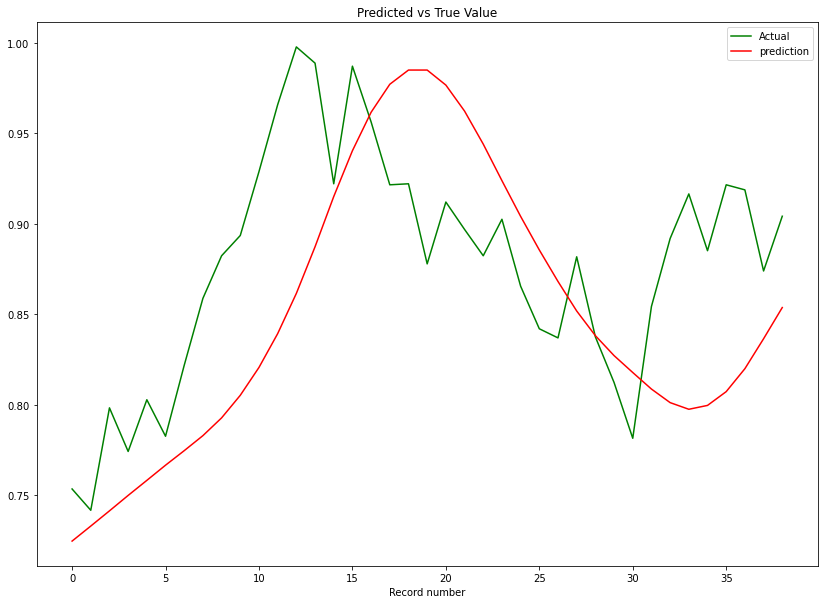

In [226]:
plt.figure(figsize=(14,10))
plt.plot(range(39),y_test[-40:-1], color = "green")
plt.plot(range(39),y_pred[-40:-1], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

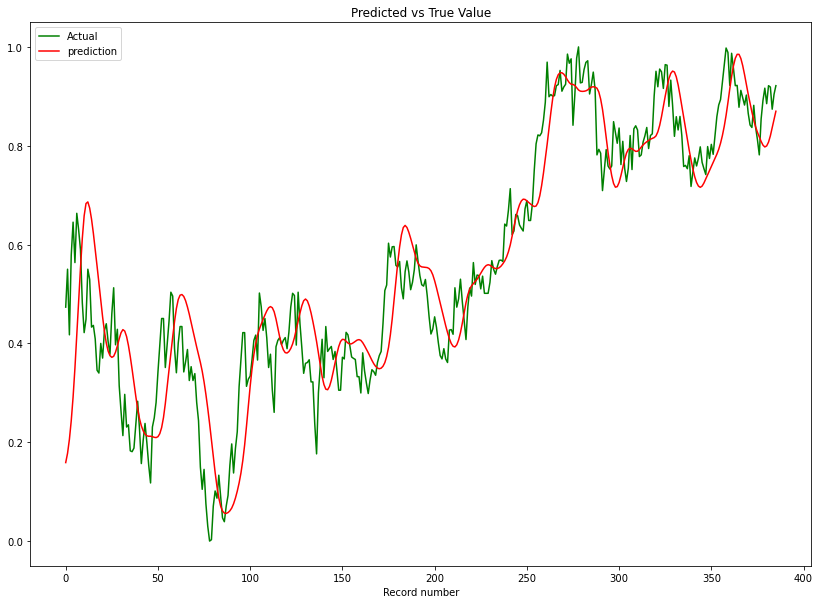

In [227]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test_ex)),y_test, color = "green")
plt.plot(range(len(X_test_ex)),y_pred, color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()